__Chapter 14 - Going Deeper – The Mechanics of TensorFlow__

1. [Import](#Import)
1. [TensorFlow ranks and tensors](#TensorFlow-ranks-and-tensors)
    1. [How to get the rank and shape of a tensor](#How-to-get-the-rank-and-shape-of-a-tensor)
1. [Understanding TensorFlow's computation graphs](#Understanding-TensorFlows-computation-graphs)
1. [Placeholders in TensorFlow](#Placeholders-in-TensorFlow)
    1. [Defining placeholders](#Defining-placeholders)
    1. [Feeding placeholders with data](#Feeding-placeholders-with-data)
    1. [Defining placeholders for data arrays with varying batchsizes](#Defining-placeholders-for-data-arrays-with-varying-batchsizes)
1. [Variables in TensorFlow](#Variables-in-TensorFlow)
    1. [Defining variables](#Defining-variables)
    1. [Initializing variables](#Initializing-variables)
    1. [Variable scope](#Variable-scope)
    1. [Reusing variables](#Reusing-variables)
1. [Building a regression model](#Building-a-regression-model)
1. [Executing objects in a TensorFlow graph using their names](#Executing-objects-in-a-TensorFlow-graph-using-their-names)
1. [Saving and restoring a model in TensorFlow](#Saving-and-restoring-a-model-in-TensorFlow)
1. [Transforming Tensors as multidimensional data arrays](#Transforming-Tensors-as-multidimensional-data-arrays)
1. [Utilizing control flow mechanics in building graphs](#Utilizing-control-flow-mechanics-in-building-graphs)
1. [Visualizing the graph with TensorBoard](#Visualizing-the-graph-with-TensorBoard)


# Import

<a id = 'Import'></a>

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
from io import StringIO
import warnings

warnings.simplefilter("ignore")
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:,.6f}".format

# modeling extensions
import sklearn.base as base
import sklearn.cluster as cluster
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
import sklearn.ensemble as ensemble
import sklearn.feature_extraction as feature_extraction
import sklearn.feature_selection as feature_selection
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics
import sklearn.model_selection as model_selection
import sklearn.neighbors as neighbors
import sklearn.pipeline as pipeline
import sklearn.preprocessing as preprocessing
import sklearn.svm as svm
import sklearn.tree as tree
import sklearn.discriminant_analysis as discriminant_analysis
import sklearn.utils as utils

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# custom extensions and settings
sys.path.append("/home/mlmachine") if "/home/mlmachine" not in sys.path else None
sys.path.append("/home/prettierplot") if "/home/prettierplot" not in sys.path else None

import mlmachine as mlm
from prettierplot.plotter import PrettierPlot
import prettierplot.style as style

# magic functions
%matplotlib inline

# TensorFlow ranks and tensors

The TensorFlow library allows users to define graphs which perform operations and functions over tensors. Tensors are a generalizable mathematical for multidimensional arrays holding data values. The dimensionality of a tensor is generally referred to as its rank. Up to this point, we have worked with tensors of rank zero to two. A scalar is a tensor of rank 0, a vector is a tensor of rank 1, and a matrix is a tensor of rank 2. Tensor notation can be generalized to higher dimensions.

<a id = 'TensorFlow-ranks-and-tensors'></a>

## How to get the rank and shape of a tensor

TensorFlow has several built in functions which easily facilitate retrieval of a Tensor's rank and shape.

<a id = 'How-to-get-the-rank-and-shape-of-a-tensor'></a>

In [2]:
# create sample graph
import tensorflow as tf

g = tf.Graph()

# defint the computation graph
with g.as_default():
    # define tensors as t1, t2, t3
    t1 = tf.constant(np.pi)
    t2 = tf.constant([1, 2, 3, 4])
    t3 = tf.constant([[1, 2], [3, 4]])

    # get the ranks
    r1 = tf.rank(t1)
    r2 = tf.rank(t2)
    r3 = tf.rank(t3)

    # get the shapes
    s1 = t1.get_shape()
    s2 = t2.get_shape()
    s3 = t3.get_shape()
    print("Shapes: {0}, {1}, {2}".format(s1, s2, s3))

with tf.Session(graph=g) as sess:
    print("Ranks: {0}, {1}, {2}".format(r1.eval(), r2.eval(), r3.eval()))

Shapes: (), (4,), (2, 2)
Ranks: 0, 1, 2


> Remarks - The rank of the t1 tensor is zero since it's just a scalar. The rank of the t2 vector is 1, and since it has four elements its shape is a one element tupe of (4,). The last shape t3 is a 2 by 2 matrix, and therfore has a rank of 2 and its shape is (2,2).

## Understanding TensorFlow's computation graphs

At its core, TensorFlow relies on building a computation graph. This graph is used to derive relationships between tensors from the input all the way through to the output. As an example, if we have rank 0 tensor (a scalar) and tensors a, b and c, and we want to evaluate $z = 2 \times (a-b) + c$. The graph can be described as follows: Tensors a and b feed into $r_1$, which is equal to $a-b$. The resulting $r_1$ is referred to as an intermediate result tensor. $r_1 = a-b$ feeds into another intermediate graph $r_2$, which is equal to $2 \times r_1$. The intermediate result tensor $r_2$, along with c, are fed into the final result tensor $z$, which is equal to $r_2 + c$. This series of operations can be reimagined as a network of nodes, where each node represents an operation where a function is applied to one or more input tensors, and yields zero or more output tensors.

TensorFlow needs to be able to build this computational graph. The individual steps for building a typical graph are:

1. Instantiate a new, empty computation graph
2. Add nodes (tensors and operations) to the graph
3. Execute the graph by:
    1. Start a new session
    2. Initialize the variables in the graph
    3. Run the computation graph in this session

<a id = 'Understanding-TensorFlows-computation-graphs'></a>

In [3]:
# computation graph for the equation above
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name="a")
    b = tf.constant(2, name="b")
    c = tf.constant(3, name="c")

    z = 2 * (a - b) + c

In the code above, 'with g.as_default()' adds nodes described within to the graph. By setting 'g' as the default graph, we are overriding the default graph that would otherwise takeover. Explicitly declaring which graph we want to use helps to avoid losing track of nodes.

A TensorFlow session is an enviroment in which operations and tensors of a graph can be executed. A session gets created by calling 'tf.Session' that receives an existing graph as an argument. If 'tf.Session(graph = g)' is called, the session uses the graph 'g', otherwise it uses the default graph, which may be empty and not what we expect.

Once a graph is launched in a TensorFlow session, we can execute its nodes containing tensors and/or its declared operations. Evaluating each individual tensor involves calling the 'eval' method inside the current session. When a specific tensor in the graph, TensorFlow executes all of the nodes that preceed that tensor until it reaches the tensor being specified.

Operations can also be excuted by using a session's 'run' method. In the previous chappter, an example executed an operator called 'train_op'. This operator doesn't return any tensor, but can still be executed by running 'train_op.run(). Further, there is a universal way of running both tensors and operators - 'tf.Session().run()'. This approach can be used to place multiple tensors and operators in a list or a tuple. As a result 'tf.Session().run()' will return a list or tuple of the same size.

Below, the previous graph is launched in a TensorFlow session and evaluates the tensor $z$ as follows:

In [4]:
# print result
with tf.Session(graph=g) as sess:
    print("2 * (a - b) + c => {0}".format(sess.run(z)))

2 * (a - b) + c => 1


# Placeholders in TensorFlow

Placeholders are a special mechanism for feeding data into TensorFlow. These are predefined tensors with specific data types and shapes.

<a id = 'Placeholders-in-TensorFlow'></a>

## Defining placeholders

Placeholders are defined using 'tf.placeholder'. The shape and data type are determined by the shape and the data type of the data that is fed into the placeholder at the time of execution. We can define the another graph that also evaluates $z = 2(a-b)+c$, but this time use placeholders for the scalars a, b and c. We also store the intermediate tensors $r_1$ and $r_2.

<a id = 'Defining placeholders'></a>

In [5]:
# simple placeholder examples
g = tf.Graph()
with g.as_default():
    tf_a = tf.placeholder(tf.int32, shape=[], name="tf_a")
    tf_b = tf.placeholder(tf.int32, shape=[], name="tf_b")
    tf_c = tf.placeholder(tf.int32, shape=[], name="tf_c")

    r1 = tf_a - tf_b
    r2 = 2 * r1
    z = r2 + tf_c

> Remarks - Three placeholders, tf_a, tf_b and tf_c are set with the data type tf.int32 and a shape equal to [], which is what we use for rank 0 tensors (aka scalars). If we were using tensors of higher dimensions, such as a rank 3 tensor with a shape of 3 x 4 x 5, the shape might be [2, 3, 4]

## Feeding placeholders with data

A python dictionary is used to feed the values of placeholders into the session's graph. We need to ensure the data we feed in is consistent with the data type and shape of the placeholders. In the graph declared above, we have three placeholders that are tf.int32 scalars. Now we can feed in arbitrary int32 integers:

<a id = 'Feeding-placeholders-with-data'></a>

In [6]:
# feed data into placeholder
with tf.Session(graph=g) as sess:
    feed = {tf_a: 1, tf_b: 2, tf_c: 3}
    print("z: {0}".format(sess.run(z, feed_dict=feed)))

z: 1


## Defining placeholders for data arrays with varying batchsizes

Neural network models often deal with min-batches of data that have different sizes. For example, training may occur with mini-batches of a user-defined size, but then prediction may be made on only a single sample.

TensorFlow placeholders can accomodate this by specifying None for the dimension that will be varying in size.

<a id = 'Defining-placeholders-for-data-arrays-with-varying-batchsizes'></a>

In [7]:
# Create graph
g = tf.Graph()

with g.as_default():
    tf_x = tf.placeholder(tf.float32, shape=[None, 2], name="tf_x")
    x_mean = tf.reduce_mean(tf_x, axis=0, name="mean")

# run graph in session
np.random.seed(123)

with tf.Session(graph=g) as sess:
    x1 = np.random.uniform(low=0, high=1, size=(5, 2))
    print("Feeding data with shape: {}".format(x1.shape))
    print("Result: {}".format(sess.run(x_mean, feed_dict={tf_x: x1})))

    x2 = np.random.uniform(low=0, high=1, size=(10, 2))
    print("Feeding data with shape: {}".format(x2.shape))
    print("Result: {}".format(sess.run(x_mean, feed_dict={tf_x: x2})))

Feeding data with shape: (5, 2)
Result: [0.6208972  0.46750155]
Feeding data with shape: (10, 2)
Result: [0.46306401 0.48766556]


In [8]:
# review the shape of tf_x
print(tf_x)

Tensor("tf_x:0", shape=(?, 2), dtype=float32)


# Variables in TensorFlow

Variables are a special type of tensor object that allows us to store and update parameters of our models in a TensoFlow session during the training process

<a id = 'Variables-in-TensorFlow'></a>

## Defining variables

TensorFlow variables store the parameters of a model that can be updated during training. The obvious example would the weights in the input, hidden and output layers of a neural network. When a variable is defined, we need to initialize it with a tensor of values. There are two ways to define variables

- tf.Variable()

This is a class that creates an object for a new variable and adds it to the graph. It does not have explicit shape and dtype parameters. These attributes are inferred from the initial values of the variable.

- tf.get_variable(

This approach enables us to reuse an existing variable with a certain name, or create a new variable if the name used does not exist in the graph yet. This approach also allows for declaration of dtype and shape, which are only necessary when declaring a new variable.

In both initialization techniques, the initial values are not set until the graph is launched via tf.Session.

<a id = 'Defining-variables'></a>

In [9]:
# variable example
g1 = tf.Graph()

with g1.as_default():
    w = tf.Variable(np.array([[1, 2, 3, 4], [5, 6, 7, 8]]), name="w")
    print(w)

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'w:0' shape=(2, 4) dtype=int64_ref>


## Initializing variables

The computer memory that holds the variable is not allocated until the variables are initialized. Therefore, if we want to evaluate a tensor that includes a variable somewhere with its portion of the graph, we need to initialize the variables in that graph first. Initialization can occur using two methods. TensorFlow has a function named tf.global_variables_initializer, which, when executed, initializes the variables. We can also store this operator in an object, such as init_op = tf.global_variables_initializer(), which can then be executed later by sess.run(init_op) or init_op.run(). The key is that the operator is created after all variables that we need have been defined. A quick example illustrates this:

<a id = 'Initializing-variables'></a>

In [10]:
# initialize variables in graph
g2 = tf.Graph()

with g2.as_default():
    w1 = tf.Variable(1, name="w1")
    init_op = tf.global_variables_initializer()
    w2 = tf.Variable(2, name="w2")

In [11]:
# print variable
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print("w1: {}".format(sess.run(w1)))

w1: 1


In [12]:
# NOTE: This is an intentional error intended to highlight the importance of sequence as it relates to variable initialization
# print variable
with tf.Session(graph=g2) as sess:
    sess.run(init_op)
    print("w2: {}".format(sess.run(w2)))

FailedPreconditionError: Attempting to use uninitialized value w2
	 [[{{node _retval_w2_0_0}}]]

> Remarks - In the example above, 'w2' is declared after the variables are initialized, so it couldn't be evaluated. Reordering the lines would fix this.

## Variable scope

Variable scopes allow variables to be organized into separate subparts. As an example, if we have two subnetworks within one neural network, we can define to scopres named 'net_A' and 'net_B'. Then each layer will be defined one of these two scopes.

<a id = 'Variable-scope'></a>

In [13]:
# scope illustrating variable scope
g = tf.Graph()

with g.as_default():
    with tf.variable_scope("net_A"):
        with tf.variable_scope("layer-1"):
            w1 = tf.Variable(tf.random_normal(shape=(10, 4)), name="weights")
        with tf.variable_scope("layer-2"):
            w2 = tf.Variable(tf.random_normal(shape=(20, 10)), name="weights")
    with tf.variable_scope("net_B"):
        with tf.variable_scope("layer-1"):
            w3 = tf.Variable(tf.random_normal(shape=(10, 4)), name="weights")

print(w1)
print(w2)
print(w3)

<tf.Variable 'net_A/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>
<tf.Variable 'net_A/layer-2/weights:0' shape=(20, 10) dtype=float32_ref>
<tf.Variable 'net_B/layer-1/weights:0' shape=(10, 4) dtype=float32_ref>


> Remarks - Note that the variable names are displayed with their corresponding variable scope names

## Reusing variables

In the context of a neural network model that has a classifier whose input data comes from more than one data source, we need to be able to accomodate that complexity. For example, if we have data $(X_A,y_A)$ coming from source $A$ and data $(X_B,y_B)$ coming from source $B$. the graph needs to be designed in a way that is will use the data from only one source as input tensor to build the network. Then we can feed the data from the other source to the same classifier. Let's say source A is fed through a placholder, and source B is the output of a generator network.

<a id = 'Reusing-variables'></a>

In [14]:
# custom helper functions
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(
        name="weights", shape=(data_shape[1], n_classes), dtype=tf.float32
    )
    bias = tf.get_variable(name="bias", initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name="logits")
    return logits, tf.nn.softmax(logits)


def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name="w1")
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name="b1")

    hidden = tf.add(tf.matmul(data, w1), b1, name="hidden_pre-activation")
    hidden = tf.nn.relu(hidden, "hidden_activation")

    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name="w2")
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name="b2")

    output = tf.add(tf.matmul(hidden, w2), b2, name="output")
    return output, tf.nn.sigmoid(output)

In [15]:
# build the graph
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name="tf_x")

    # build generator
    with tf.variable_scope("generator"):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)

    # build classifier
    with tf.variable_scope("classifier") as scope:
        # classifier for original data
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))

        # reuse the classifier for the generator data
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

> Remarks - build_classifier is called twice. The first call builds the network. Then scope.reuse_variables() is called before calling the function again. As a result, the second call does not create new variables and instead reuses the same variables.

# Building a regression model

The goal is to implement a linear regression model: $\hat{y} = wx+b$. The variables $w$ and $b$ need to be defined as TensorFlow variables, and $x$ is the input for the model so this must be a placeholder. We also need to formulate a cost function, which for this model will be Mean Squared Error (MSE).

$$
MSE = \frac{1}{n}\sum^n_{i=1}\big(y^i-\hat{y}^i\big)
$$

$y$ is the true value, which is given as the input to this model for training, so that means we also need a placeholder for $y$. And $\hat{y}$ is the prediciton, which will be computed using TensorFlow operations, namely tf.matmul and tf.add. Here is a summary of all the tensors in play:

- Input $x$: tf_x defined as a placeholder
- Input $y$: tf_y defined as a placeholder
- Model parameter $w$: weight defined as variable
- Model parameter $b$: bias defined as a variable
- Model output $\hat{y}$: returned by the Tensorflow operations to compute the prediction using the regression model.

<a id = 'Building-a-regression-model'></a>

In [16]:
# build the graph for linear regression
g = tf.Graph()

with g.as_default():
    tf.set_random_seed(123)
    tf_x = tf.placeholder(shape=(None), dtype=tf.float32, name="tf_x")
    tf_y = tf.placeholder(shape=(None), dtype=tf.float32, name="tf_y")

    weight = tf.Variable(tf.random_normal(shape=(1, 1), stddev=0.25), name="weight")
    bias = tf.Variable(0.0, name="bias")

    y_hat = tf.add(weight * tf_x, bias, name="y_hat")

    cost = tf.reduce_mean(tf.square(tf_y - y_hat), name="cost")

    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(cost, name="train_op")

Instructions for updating:
Use tf.cast instead.


In [17]:
# create a session to launch the graph
np.random.seed(0)


def make_random_data():
    x = np.random.uniform(low=-2, high=4, size=200)
    y = []
    for t in x:
        r = np.random.normal(loc=0.0, scale=(0.5 + t * t / 3), size=None)
        y.append(r)
    return x, 1.726 * x - 0.84 + np.array(y)


x, y = make_random_data()

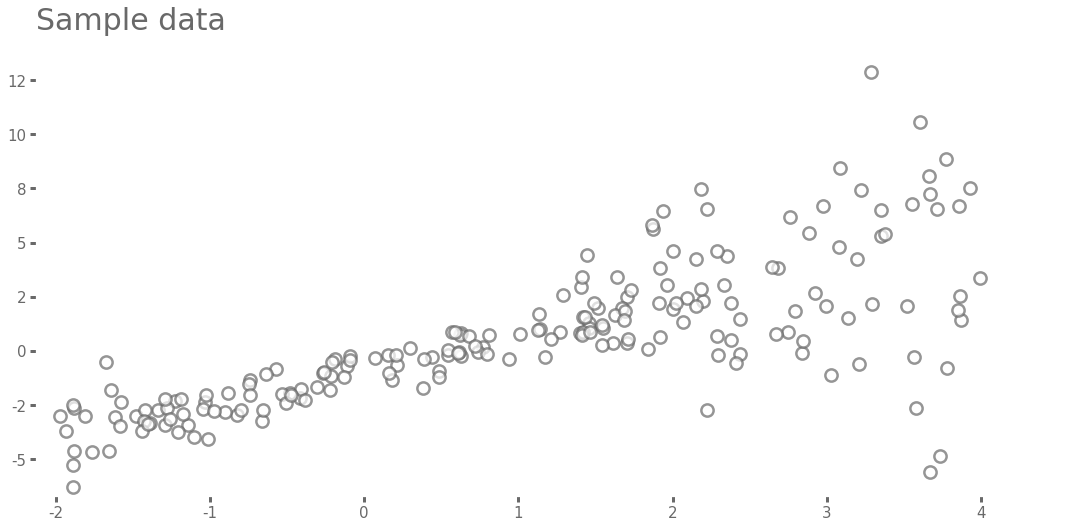

In [18]:
# visualize sample data
p = PrettierPlot()
ax = p.make_canvas(title="Sample data")
p.pretty_2d_scatter(x=np.array(x), y=np.array(y), ax=ax)

The process for training the model starts with creating a TensorFlow session. then we initialize the variables. After that we can use a for loop to execute the train operator and caculate the training cost simultaneously.

In [19]:
# split into train/test sets
X_train, y_train = x[:100], y[:100]
X_test, y_test = x[100:], y[100:]

n_epochs = 500
training_costs = []

# train model
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())

    # train for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x: X_train, tf_y: y_train})
        training_costs.append(c)
        if not e % 50:
            print("Epoch {:3d}: {:.4f}".format(e, c))

Epoch   0: 12.2230
Epoch  50: 8.3876
Epoch 100: 6.5721
Epoch 150: 5.6844
Epoch 200: 5.2269
Epoch 250: 4.9725
Epoch 300: 4.8169
Epoch 350: 4.7119
Epoch 400: 4.6347
Epoch 450: 4.5742


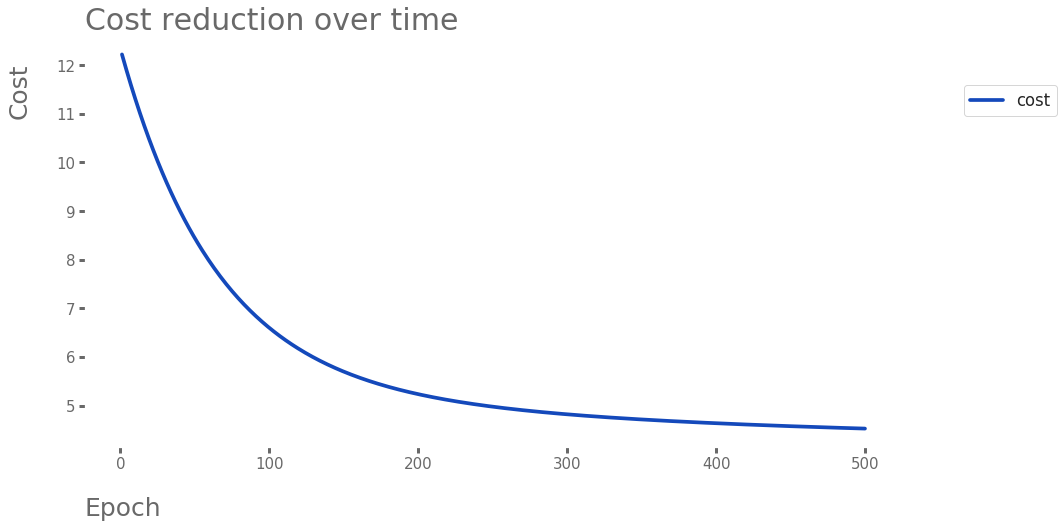

In [20]:
# visualize loss by epoch
p = PrettierPlot()
ax = p.make_canvas(
    title="Cost reduction over time", x_label="Epoch", y_label="Cost", y_shift=0.8
)
p.pretty_line(
    x=np.arange(1, n_epochs + 1),
    y=np.array(training_costs),
    label="cost",
    linecolor=style.style_hex_mid[0],
    bbox=(1.2, 0.9),
    marker_on=False,
    ax=ax,
)

# Executing objects in a TensorFlow graph using their names

Executing variables and operators by their names is a useful approach. For example, if we develop a model in a separate module, the variables are not available in a different Python scope. However, if we have a graph, we can execute the nodes of the graph using the declared names in the graph.

This can be done by changing the sess.run method in the code above by using the variable name of __cost__ in the graph rather than the Python variable cost by changing ses.run([cost, train_op], ...) to sess.run(['cost:0', 'train_op],...)

<a id = 'Executing-objects-in-a-TensorFlow-graph-using-their-names'></a>

In [21]:
# split into train/test sets
X_train, y_train = x[:100], y[:100]
X_test, y_test = x[100:], y[100:]

n_epochs = 500
training_costs = []

# train model
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())

    # train for n_epochs
    for e in range(n_epochs):
        c, _ = sess.run(
            ["cost:0", "train_op"], feed_dict={"tf_x:0": X_train, "tf_y:0": y_train}
        )
        training_costs.append(c)
        if not e % 50:
            print("Epoch {:3d}: {:.4f}".format(e, c))

Epoch   0: 12.2230
Epoch  50: 8.3876
Epoch 100: 6.5721
Epoch 150: 5.6844
Epoch 200: 5.2269
Epoch 250: 4.9725
Epoch 300: 4.8169
Epoch 350: 4.7119
Epoch 400: 4.6347
Epoch 450: 4.5742


> Remarks - the suffix ':0' is added because TensorFlow appends this string to the variable name so that 'tf_x' becomes 'tf_x:0'. And if we try to create another tensor with the same name in the same graph, it would become 'tf_x_1:0', and then 'tf_x_2:0' and so on. This assuming we are not trying to resuse a tensor that we already created.

# Saving and restoring a model in TensorFlow

In the previous section, we built a graph and trainined it, but we didn't make predictions using the test set. We could feed the test set to the model as soon as it's trained, but this is a very inefficient approach. The better approach is to save the model for reuse with new data. To do so, we need to add a new node to the graph, which is an instance of the tf.train.Saver class

<a id = 'Saving-and-restoring-a-model-in-TensorFlow'></a>

In [22]:
# add a new saver node to the existing graph
with g.as_default():
    saver = tf.train.Saver()

# retrain model with an additional call to saver
n_epochs = 500
trainin_costs = []
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())

    for e in range(n_epochs):
        c, _ = sess.run([cost, train_op], feed_dict={tf_x: X_train, tf_y: y_train})

        training_costs.append(c)
        if not e % 50:
            print("Epoch {:4d}: {:.4f}".format(e, c))
    saver.save(sess, "./ch14_files/trained-model")

Epoch    0: 12.2230
Epoch   50: 8.3876
Epoch  100: 6.5721
Epoch  150: 5.6844
Epoch  200: 5.2269
Epoch  250: 4.9725
Epoch  300: 4.8169
Epoch  350: 4.7119
Epoch  400: 4.6347
Epoch  450: 4.5742


This create thre files with the extensions '.data', '.index' and '.meta'. TensorFlow uses protocol buffers which is a language-agnostic way of serializing data. To restore a trained model:

1. Rebuild the graph that has the same nodes and names as the saved model
2. Restore the saved variables in a new tf.Session

To accomplish step one, we could run the original statements again, but there is a more practical way to do this. All of the graph info is saved as metadata in the '.meta' file. And after recreating the graph, we can use this 'recreation' object to restore the parameters of that model.

In [23]:
# rebuild graph
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph("./ch14_files/trained-model.meta")
    new_saver.restore(sess, "./ch14_files/trained-model")
    y_pred = sess.run("y_hat:0", feed_dict={"tf_x:0": X_test})

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./ch14_files/trained-model


> Remarks - The tensor for $\hat{y}$ was referenced by the name given previously, as was the tensor for the tf_x placeholder. As a side note, there is no need to feed in the values for the true y values (tf_y). The model is already trained, so we're only passing in the test values, and the node for determining $\hat{y}$ does not depend on tf_y.

In [24]:
# rebuild graph
x_arr = np.arange(-2, 4, 0.1)
g2 = tf.Graph()
with tf.Session(graph=g2) as sess:
    new_saver = tf.train.import_meta_graph("./ch14_files/trained-model.meta")
    new_saver.restore(sess, "./ch14_files/trained-model")
    y_pred = sess.run("y_hat:0", feed_dict={"tf_x:0": x_arr})

INFO:tensorflow:Restoring parameters from ./ch14_files/trained-model


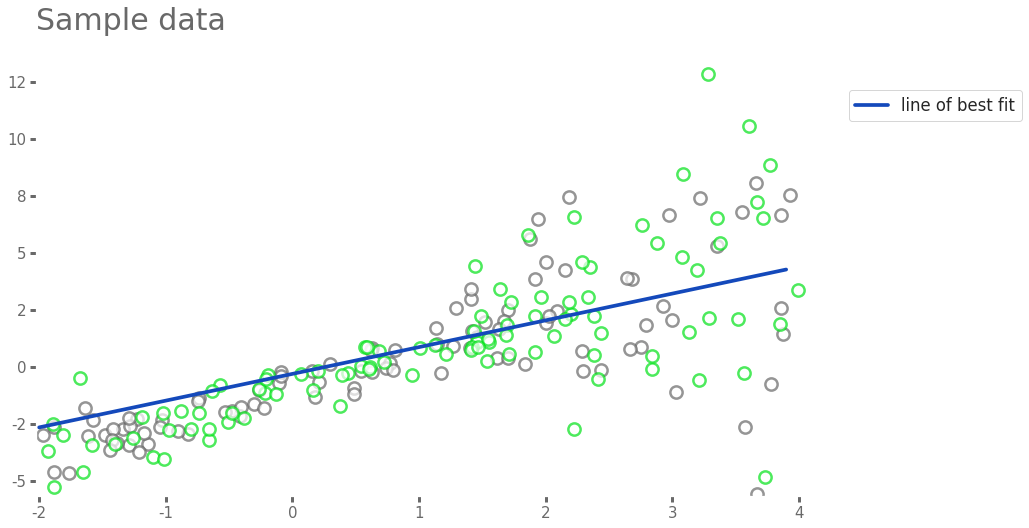

In [25]:
# visualize predicitons
p = PrettierPlot()
ax = p.make_canvas(title="Sample data")
p.pretty_2d_scatter(x=X_train, y=y_train, color=style.style_grey, ax=ax)
p.pretty_2d_scatter(x=X_test, y=y_test, color=style.style_hex_mid[1], ax=ax)
p.pretty_line(
    x=np.array(x_arr),
    y=np.array(y_pred).reshape(-1, 1),
    label="line of best fit",
    linecolor=style.style_hex_mid[0],
    bbox=(1.2, 0.9),
    marker_on=False,
    ax=ax,
)

> Remarks - Saving and restoring the model is often done during the actual training of the model as well because this enables breaking up the training phase into smaller tasks. For example, if a model will run for 100 epochs, this can be broke into 25 tasks, where each of the 25 tasks would run four epochs sequentially. 

# Transforming Tensors as multidimensional data arrays

TensorFlow has several operators that can be used to transform tensors. These often work similarly to numpy, but things get trickty when dealing with tensors with ranks higher than 2.

<a id = 'Transforming-Tensors-as-multidimensional-data-arrays'></a>

In [26]:
# use the attribute tf.get_shape to get the shape of a tensor
g = tf.Graph()
with g.as_default():
    arr = np.array([[1.0, 2.0, 3.0, 3.5], [4.0, 5.0, 6.0, 6.5], [7.0, 8.0, 9.0, 9.5]])
    T1 = tf.constant(arr, name="T1")
    print(T1)
    s = T1.get_shape()
    print("Shape of T1 is: {}".format(s))

    T2 = tf.Variable(tf.random_normal(shape=s))
    print(T2)

    T3 = tf.Variable(tf.random_normal(shape=(s.as_list()[0],)))
    print(T3)

Tensor("T1:0", shape=(3, 4), dtype=float64)
Shape of T1 is: (3, 4)
<tf.Variable 'Variable:0' shape=(3, 4) dtype=float32_ref>
<tf.Variable 'Variable_1:0' shape=(3,) dtype=float32_ref>


In [27]:
# print sample arrays
with g.as_default():
    T4 = tf.reshape(T1, shape=[1, 1, -1], name="T4")
    print(T4)

    T5 = tf.reshape(T1, shape=[1, 3, -1], name="T5")
    print(T5)

Tensor("T4:0", shape=(1, 1, 12), dtype=float64)
Tensor("T5:0", shape=(1, 3, 4), dtype=float64)


In [28]:
# print the elements of T4 and T5
with tf.Session(graph=g) as sess:
    print(sess.run(T4))
    print()
    print(sess.run(T5))

[[[1.  2.  3.  3.5 4.  5.  6.  6.5 7.  8.  9.  9.5]]]

[[[1.  2.  3.  3.5]
  [4.  5.  6.  6.5]
  [7.  8.  9.  9.5]]]


In [29]:
# transpose arrays
with g.as_default():
    T6 = tf.transpose(T5, perm=[2, 1, 0])
    print(T6)

    T7 = tf.transpose(T5, perm=[0, 2, 1], name="T7")
    print(T7)

# print the elements of T6 and T7
with tf.Session(graph=g) as sess:
    print(sess.run(T6))
    print()
    print(sess.run(T7))

Tensor("transpose:0", shape=(4, 3, 1), dtype=float64)
Tensor("T7:0", shape=(1, 4, 3), dtype=float64)
[[[1. ]
  [4. ]
  [7. ]]

 [[2. ]
  [5. ]
  [8. ]]

 [[3. ]
  [6. ]
  [9. ]]

 [[3.5]
  [6.5]
  [9.5]]]

[[[1.  4.  7. ]
  [2.  5.  8. ]
  [3.  6.  9. ]
  [3.5 6.5 9.5]]]


In [30]:
# split tensors into subtensors with tf.split
with g.as_default():
    t5_split = tf.split(T5, num_or_size_splits=2, axis=2, name="T8")
    print(t5_split)

[<tf.Tensor 'T8:0' shape=(1, 3, 2) dtype=float64>, <tf.Tensor 'T8:1' shape=(1, 3, 2) dtype=float64>]


> Remarks - Note that this is now a list of tensors, rather than a tensor object

In [31]:
# concatenate multiple tensors
# a list of tensors with the same shape and dytpe can be combined with tf.concat
g = tf.Graph()
with g.as_default():
    t1 = tf.ones(shape=(5, 1), dtype=tf.float32, name="t1")
    t2 = tf.zeros(shape=(5, 1), dtype=tf.float32, name="t2")
    print(t1)
    print(t2)

with g.as_default():
    t3 = tf.concat([t1, t2], axis=0, name="t3")
    print(t3)
    t4 = tf.concat([t1, t2], axis=1, name="t4")
    print(t4)

Tensor("t1:0", shape=(5, 1), dtype=float32)
Tensor("t2:0", shape=(5, 1), dtype=float32)
Tensor("t3:0", shape=(10, 1), dtype=float32)
Tensor("t4:0", shape=(5, 2), dtype=float32)


In [32]:
# review values of the concatenated tensors
with tf.Session(graph=g) as sess:
    print(t3.eval())
    print()
    print(t4.eval())

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


# Utilizing control flow mechanics in building graphs

TensorFlow provides a mechanism for making decisions when building a graph. However, control flow statements in TensorFlow are different from Python. As an example, we will implement the following equation in TensorFlow:

$$
res =
\left\{
    \begin{array}{ll}
        x + y  & \mbox{if } x < y \\
        x - y  & \mbox{otherwise}
    \end{array}
\right.
$$

<a id = 'Utilizing-control-flow-mechanics-in-building-graphs'></a>

In [33]:
# incorrect aproach
x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name="tf_x")
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name="tf_y")

    if x < y:
        res = tf.add(tf_x, tf_y, name="result_add")
    else:
        res = tf.subtract(tf_x, tf_y, name="result_sub")

    print("Object: {}".format(res))

with tf.Session(graph=g) as sess:
    print(
        "x < y: {} -> Result:{}".format(
            (x < y), res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})
        )
    )

    x, y = 2.0, 1.0
    print(
        "x < y: {} -> Result:{}".format(
            (x < y), res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})
        )
    )

Object: Tensor("result_add:0", dtype=float32)
x < y: True -> Result:3.0
x < y: False -> Result:3.0


> Remarks - The res object is a tensor named 'result_add:0'. The key point is that the computation graph has only one branch associated with the addition operator at the top of the control lfow statement, and the subtract operator has not been called. Because the TensorFlow graph is static, this means that once the graph is build, it remains unchanged during the execution process. So even though we changed the values of x and y and feed these new values to the graph, these new tensors go through the same path in the graph. Therefore, in both cases we get the same output of 3.0

In [34]:
# correct version
x, y = 1.0, 2.0

g = tf.Graph()
with g.as_default():
    tf_x = tf.placeholder(dtype=tf.float32, shape=None, name="tf_x")
    tf_y = tf.placeholder(dtype=tf.float32, shape=None, name="tf_y")

    res = tf.cond(
        tf_x < tf_y,
        lambda: tf.add(tf_x, tf_y, name="result_add"),
        lambda: tf.subtract(tf_x, tf_y, name="result_sub"),
    )
    print("Object: {}".format(res))

with tf.Session(graph=g) as sess:
    print(
        "x < y: {} -> Result:{}".format(
            (x < y), res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})
        )
    )

    x, y = 2.0, 1.0
    print(
        "x < y: {} -> Result:{}".format(
            (x < y), res.eval(feed_dict={"tf_x:0": x, "tf_y:0": y})
        )
    )

Object: Tensor("cond/Merge:0", dtype=float32)
x < y: True -> Result:3.0
x < y: False -> Result:1.0


> Remarks - Now this process creates res, which is instead an object named 'cond/Merg:0'. In this case, the computation graph has two branches with a mechanism to decidde which branch to follow during execution.

In [35]:
# TensorFow tf.case operator
# this is similar to a Python if...ekse statement
# incorrect example
if x < y:
    result = 1
else:
    result = 0
result

0

In [36]:
# correct example
f1 = lambda: tf.constant(1)
f2 = lambda: tf.constant(0)
result = tf.case([(tf.less(x, y), f1)], default=f2)
result

<tf.Tensor 'case/cond/Merge:0' shape=() dtype=int32>

In [37]:
# while loop
# correct example
i = tf.constant(0)
threshold = 100
c = lambda i: tf.less(i, 100)
b = lambda i: tf.add(i, 1)
r = tf.while_loop(cond=c, body=b, loop_vars=[i])

# Visualizing the graph with TensorBoard

TensorFlow has a feature called TensorBoard, which isa module for visualizing computation graphs, as well as visualizing the learning of a model. We will be able to observe the connection between nodes, explore dependencies and debug the model if needed. This example will be built upon the model above that used variable scope to divide the generator created data from the original stream of data.

<a id = 'Visualizing-the-graph-with-TensorBoard'></a>

In [38]:
# custom helper functions
def build_classifier(data, labels, n_classes=2):
    data_shape = data.get_shape().as_list()
    weights = tf.get_variable(
        name="weights", shape=(data_shape[1], n_classes), dtype=tf.float32
    )
    bias = tf.get_variable(name="bias", initializer=tf.zeros(shape=n_classes))
    logits = tf.add(tf.matmul(data, weights), bias, name="logits")
    return logits, tf.nn.softmax(logits)


def build_generator(data, n_hidden):
    data_shape = data.get_shape().as_list()
    w1 = tf.Variable(tf.random_normal(shape=(data_shape[1], n_hidden)), name="w1")
    b1 = tf.Variable(tf.zeros(shape=n_hidden), name="b1")

    hidden = tf.add(tf.matmul(data, w1), b1, name="hidden_pre-activation")
    hidden = tf.nn.relu(hidden, "hidden_activation")

    w2 = tf.Variable(tf.random_normal(shape=(n_hidden, data_shape[1])), name="w2")
    b2 = tf.Variable(tf.zeros(shape=data_shape[1]), name="b2")

    output = tf.add(tf.matmul(hidden, w2), b2, name="output")
    return output, tf.nn.sigmoid(output)

In [39]:
# run classifier
batch_size = 64
g = tf.Graph()

with g.as_default():
    tf_X = tf.placeholder(shape=(batch_size, 100), dtype=tf.float32, name="tf_x")

    # build generator
    with tf.variable_scope("generator"):
        gen_out1 = build_generator(data=tf_X, n_hidden=50)

    # build classifier
    with tf.variable_scope("classifier") as scope:
        # build classifier for original data
        cls_out1 = build_classifier(data=tf_X, labels=tf.ones(shape=batch_size))

        # reuse the classifier for generated data
        scope.reuse_variables()
        cls_out2 = build_classifier(data=gen_out1[1], labels=tf.zeros(shape=batch_size))

In [40]:
# sent results to file
with tf.Session(graph=g) as sess:
    sess.run(tf.global_variables_initializer())

    file_writer = tf.summary.FileWriter(logdir="./ch14_files/", graph=g)